# 05 TFIDF plus LogReg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
# TODO more model types can be imported here if interesting

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# we may choose to only optimize for Tfidf bc this structures the data with more information 
from nltk.corpus import stopwords

In [2]:
# Read in data
posts = pd.read_csv('./data/posts_cleaned.csv')
posts.head()

,created_utc,all_text,subreddit
0,2021-01-31 16:31:41,I gave someone oral sex as a means to pacify t...,1
1,2023-03-22 16:14:59,The cable man took the key to my apartment\n\n...,1
2,2024-02-26 22:36:25,how do i know if im in gay love with my friend...,1
3,2012-08-07 22:42:45,"Woman here, would someone mind clarifying some...",0
4,2013-01-20 14:42:18,This article about Hillary Clinton's egalitari...,0


In [3]:
X = posts['all_text']
y = posts['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Set up a pipeline up with two stages:
# 1. tf-idf vectorizer (transformer)
    # optimize parameters for this tokenizer strategy
# 2. LogisticRegression
    # optimize logistic regression params for this classification strategy

pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

params = {
    'tvec__stop_words': [None],
    'tvec__min_df': [2],
    'tvec__ngram_range': [(1, 2)],
    'tvec__max_features': [5000],
    'logreg__C': np.logspace(0, 1, 10),
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver':['liblinear'],
    
}

gs = GridSearchCV(pipe, params, n_jobs=4)

In [26]:
%%time
gs.fit(X_train, y_train)

CPU times: user 2.47 s, sys: 397 ms, total: 2.86 s
Wall time: 46.4 s


GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=4,
             param_grid={'logreg__C': array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ]),
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear'],
                         'tvec__max_features': [5000], 'tvec__min_df': [2],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': [None]})

In [28]:
gs.score(X_test, y_test)

0.8150917743031951

In [27]:
gs.score(X_train, y_train)

0.8893925657298277

Better, but not remarkably so.  In fact, things are more overfit.

In [29]:
gs.best_params_

{'logreg__C': 2.154434690031884,
 'logreg__penalty': 'l1',
 'logreg__solver': 'liblinear',
 'tvec__max_features': 5000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

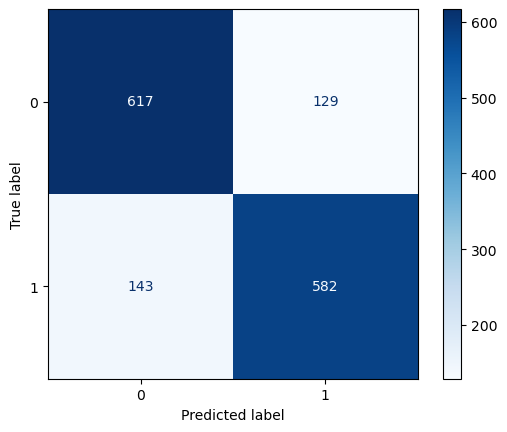

In [32]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap='Blues');

In [ ]:
# we gained ground in predicting mrm accurately and held steady on twox